# Crecimiento Económico y Sostenibilidad
Katlyn Goeujon-Mackness <br>
05/05/2025

## Introducción
El crecimiento económico y la sostenibilidad ambiental son temas clave en el mundo actual. A menudo, se piensa que desarrollar la economía implica aumentar la contaminación, pero es posible avanzar sin dañar el planeta?
<br><br>
Este análisis busca entender la relación entre el Producto Interno Bruto (PIB), el uso de energía renovable y las emisiones de CO₂. Para ello, primero exploraremos cómo se distribuyen estos datos con gráficos de histograma, lo que nos ayudará a ver patrones generales. Luego, con gráficos de dispersión, analizaremos si los países con mayor PIB generan más contaminación o si, por el contrario, invierten más en energías limpias para reducir su impacto ambiental.
<br><br>
A través de visualizaciones interactivas y análisis detallado, este estudio buscará responder preguntas fundamentales: ¿Las economías más prósperas son también las más sostenibles? ¿Existen regiones que logren un equilibrio entre crecimiento y protección ambiental? Los hallazgos obtenidos podrán servir como base para recomendaciones de políticas que fomenten un desarrollo económico más responsable y sostenible.

### Objetivo
En este análisis, exploraremos si existe evidencia de que el crecimiento económico puede darse sin aumentar las emisiones de CO₂. Los resultados de este estudio pueden ser clave para definir políticas que equilibren desarrollo y sostenibilidad.

### Teoría
Aplicaremos principios de visualización para crear gráficos claros y comprensibles, basándonos en los enfoques de Gestalt, Tufte y Holmes. Estos métodos permiten estructurar los datos de manera intuitiva, eliminar elementos innecesarios para destacar lo esencial y presentar la información como una historia visual atractiva.

### Los Datos
Se utiliza tres conjuntos de datos para este análisis.
1. [GDP per capita (constant 2015 US$)](https://data.worldbank.org/indicator/ny.gdp.pcap.kd)
2. [Per capita CO₂ emissions](https://ourworldindata.org/explorers/co2)
3. [Renewable energy cosumption (% of total final energy comsumption)](https://data.worldbank.org/indicator/EG.FEC.RNEW.ZS)

## Selección de datos

In [44]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Cargar conjuntos de datos
gdp_df = pd.read_csv("data/gdp_per_capita.csv")
emissions_df = pd.read_csv("data/per-capita-co-emissions.csv")
renewable_df = pd.read_csv("data/renewable_energy.csv", encoding='ISO-8859-1')

## Preprocesamiento

### GDP/PIB

In [46]:
gdp_df.head(3)

,Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Afghanistan,AFG,..,..,..,..,..,..,...,565.569730408751,563.872336723147,562.769574140988,553.125151688293,557.861533207459,527.834554499306,408.625855217403,377.665627080705,379.707497269884,..
1,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Albania,ALB,..,..,..,..,..,..,...,3952.80357364813,4090.37272829183,4249.8200493985,4431.55559506989,4542.26866282892,4417.04105105395,4858.05201500931,5154.8274975368,5419.63779125273,..
2,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Algeria,DZA,2388.42007867121,2027.27351526457,1604.48773834966,2122.4310919023,2209.9069785789,2311.73974611983,...,4685.05902729002,4768.73140080218,4742.90075536604,4717.00358853556,4672.66408682198,4363.68533766912,4456.74687641147,4544.46688059647,4660.40545686886,..


In [47]:
# Drop columns with all NaN or empty values
gdp_df.dropna(axis=1, how='all', inplace=True)

# Elimina columnas no necesarias
gdp_df.drop(columns=['Series Name', 'Series Code', 'Country Code'], inplace=True)
gdp_df.head(1)

,Country Name,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Afghanistan,..,..,..,..,..,..,..,..,..,...,565.569730408751,563.872336723147,562.769574140988,553.125151688293,557.861533207459,527.834554499306,408.625855217403,377.665627080705,379.707497269884,..


In [48]:

# Cambiar los nombres de los columnas de los años
gdp_df.rename(columns=lambda x: x[:4] if gdp_df.columns.get_loc(x) in range(1, 66) else x, inplace=True)
gdp_df.head(1)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,..,..,..,..,..,..,..,..,..,...,565.569730408751,563.872336723147,562.769574140988,553.125151688293,557.861533207459,527.834554499306,408.625855217403,377.665627080705,379.707497269884,..


In [49]:
# Reestructurar los datos
gdp_df = gdp_df.melt(id_vars=["Country Name"], var_name="Year", value_name="Value")
gdp_df.head()

,Country Name,Year,Value
0,Afghanistan,1960,..
1,Albania,1960,..
2,Algeria,1960,2388.42007867121
3,American Samoa,1960,..
4,Andorra,1960,..


In [50]:
# Cambiar nombre de columna
gdp_df.rename(columns={"Value": "GDP", 
                       "Country Name": "Country"}, inplace=True)

# Ordenar gdp_df por país y luego por año
gdp_df.sort_values(by=["Country", "Year"], inplace=True)
gdp_df.reset_index(drop=True, inplace=True)

# Cambiar columna "Year" a tipo entero
gdp_df['Year'] = gdp_df['Year'].astype(int)

# Cambia columna a tipo númerico
#  Valores no númerico a nulo
gdp_df['GDP'] = pd.to_numeric(gdp_df['GDP'], errors='coerce')
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17745 entries, 0 to 17744
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  17420 non-null  object 
 1   Year     17745 non-null  int64  
 2   GDP      14009 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 416.0+ KB


In [51]:
gdp_df.head()

,Country,Year,GDP
0,Afghanistan,1960,NaN
1,Afghanistan,1961,NaN
2,Afghanistan,1962,NaN
3,Afghanistan,1963,NaN
4,Afghanistan,1964,NaN


### Emisiones

In [52]:
emissions_df.head()

,Entity,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.010837
2,Afghanistan,1951,0.011625
3,Afghanistan,1952,0.011468
4,Afghanistan,1953,0.013123


In [53]:
# Cambiar nombre de columna
emissions_df.rename(columns={"Entity": "Country",
                             "Annual CO₂ emissions (per capita)": "Emissions"}, inplace=True)
emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26182 entries, 0 to 26181
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    26182 non-null  object 
 1   Year       26182 non-null  int64  
 2   Emissions  26182 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 613.8+ KB


### Energía Renovable

In [54]:
renewable_df.head(3)

,Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Afghanistan,AFG,..,..,..,..,..,..,...,17.7,20.2,19.5,18.3,18.9,18.2,20,20,..,..
1,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Albania,ALB,..,..,..,..,..,..,...,38.5,39.4,36.9,37.8,40.1,44.4,41.9,..,..,..
2,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Algeria,DZA,..,..,..,..,..,..,...,0.1,0.1,0.1,0.2,0.2,0.1,0.1,..,..,..


In [55]:
# Drop columns with all NaN or empty values
renewable_df.dropna(axis=1, how='all', inplace=True)

# Elimina columnas no necesarias
renewable_df.drop(columns=['Series Name', 'Series Code', 'Country Code'], inplace=True)

# Cambiar los nombres de los columnas de los años
renewable_df.rename(columns=lambda x: x[:4] if renewable_df.columns.get_loc(x) in range(1, 66) else x, inplace=True)
renewable_df.head(3)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,..,..,..,..,..,..,..,..,..,...,17.7,20.2,19.5,18.3,18.9,18.2,20,20,..,..
1,Albania,..,..,..,..,..,..,..,..,..,...,38.5,39.4,36.9,37.8,40.1,44.4,41.9,..,..,..
2,Algeria,..,..,..,..,..,..,..,..,..,...,0.1,0.1,0.1,0.2,0.2,0.1,0.1,..,..,..


In [56]:
# Reestructurar los datos
renewable_df = renewable_df.melt(id_vars=["Country Name"], var_name="Year", value_name="Value")
renewable_df.head()

,Country Name,Year,Value
0,Afghanistan,1960,..
1,Albania,1960,..
2,Algeria,1960,..
3,American Samoa,1960,..
4,Andorra,1960,..


In [57]:
# Cambia columna a tipo númerico
#  Valores no númerico a nulo
renewable_df['Value'] = pd.to_numeric(renewable_df['Value'], errors='coerce')

# Cambiar columna "Year" a tipo entero
renewable_df['Year'] = renewable_df['Year'].astype(int)

# Cambiar nombre de columna
renewable_df.rename(columns={"Value": "Renewable Energy",
                             "Country Name": "Country"}, inplace=True)

# Ordenar renewable_df por país y luego por año
renewable_df.sort_values(by=["Country", "Year"], inplace=True)
renewable_df.reset_index(drop=True, inplace=True)
renewable_df.head()

,Country,Year,Renewable Energy
0,Afghanistan,1960,NaN
1,Afghanistan,1961,NaN
2,Afghanistan,1962,NaN
3,Afghanistan,1963,NaN
4,Afghanistan,1964,NaN


In [58]:
renewable_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17745 entries, 0 to 17744
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           17420 non-null  object 
 1   Year              17745 non-null  int64  
 2   Renewable Energy  8234 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 416.0+ KB


### Unir los Conjuntos de Datos

In [59]:
# Filtrar registros que tengan valores nulos en Country o Year
gdp_df = gdp_df.dropna(subset=['Country', 'Year'])
renewable_df = renewable_df.dropna(subset=['Country', 'Year'])
emissions_df = emissions_df.dropna(subset=['Country', 'Year'])

# Fusiona los conjuntos de datos por país y año para facilitar el análisis.
df = gdp_df.merge(renewable_df, on=['Country', 'Year'], how='outer')
df = df.merge(emissions_df, on=['Country', 'Year'], how='outer')
df

,Country,Year,GDP,Renewable Energy,Emissions
0,Afghanistan,1949,NaN,NaN,0.001992
1,Afghanistan,1950,NaN,NaN,0.010837
2,Afghanistan,1951,NaN,NaN,0.011625
3,Afghanistan,1952,NaN,NaN,0.011468
4,Afghanistan,1953,NaN,NaN,0.013123
...,...,...,...,...,...
32444,Zimbabwe,2020,1224.272314,84.1,0.547085
32445,Zimbabwe,2021,1305.220113,82.4,0.645915
32446,Zimbabwe,2022,1361.914530,NaN,0.648761
32447,Zimbabwe,2023,1410.737311,NaN,0.683201


### Manejo de Valores Faltantes

In [60]:
# Eliminar filas donde todas las columnas especificadas son nulas
df = df[df[['GDP', 'Renewable Energy', 'Emissions']].notna().any(axis=1)]

# Contar valores faltantes
missing_values = df.isna().sum()
print(missing_values)

Country                 0
Year                    0
GDP                 16830
Renewable Energy    22605
Emissions            4657
dtype: int64


In [61]:
# No hay datos de Energía Renovable antes de 1990
df = df[df['Year'] >= 1990]

# Verificar el rango de años después de la eliminación
print(df['Year'].describe())


count    10657.000000
mean      2006.522661
std          9.788965
min       1990.000000
25%       1998.000000
50%       2007.000000
75%       2015.000000
max       2023.000000
Name: Year, dtype: float64


In [62]:
# Agrupar paises/regiones
agrupaciones = {
    "Hong Kong SAR, China": "China",
    "Macao SAR, China": "China",
    "Hong Kong": "China",
    "Macao": "China",
    "Micronesia (country)": "Micronesia",
    "Micronesia, Fed. Sts.": "Micronesia",
    "Yemen, Rep.": "Yemen",
    "Tanzania": "United Republic of Tanzania",
    "Zanzibar": "United Republic of Tanzania",
    "Bosnia and Herzegovina": "Former Yugoslavia",
    "Montenegro": "Former Yugoslavia",
    "North Macedonia": "Former Yugoslavia",
    "Serbia": "Former Yugoslavia",
    "Slovenia": "Former Yugoslavia"
}
df['Country'] = df['Country'].replace(agrupaciones)


# Quitar grupos regionales y socioeconomicos
grupos_regionales = [
    "Africa", "Africa Eastern and Southern", "Africa Western and Central",
    "Arab World", "Asia", "Asia (excl. China and India)", "Caribbean small states",
    "Central Europe and the Baltics", "East Asia & Pacific", "East Asia & Pacific (IDA & IBRD countries)",
    "East Asia & Pacific (excluding high income)", "Europe", "Europe & Central Asia", "Europe & Central Asia (IDA & IBRD countries)",
    "Europe & Central Asia (excluding high income)", "Europe (excl. EU-27)", "Europe (excl. EU-28)", "European Union",
    "European Union (27)", "European Union (28)", "Latin America & Caribbean", "Latin America & Caribbean (excluding high income)",
    "Latin America & the Caribbean (IDA & IBRD countries)", "Middle East & North Africa", "Middle East & North Africa (IDA & IBRD countries)",
    "Middle East & North Africa (excluding high income)", "North America", "North America (excl. USA)", "Oceania", "South America",
    "South Asia", "South Asia (IDA & IBRD)", "High income", "High-income countries", "Low & middle income", "Low income",
    "Low-income countries", "Lower middle income", "Lower-middle-income countries", "Middle income", "Upper middle income",
    "Upper-middle-income countries", "IDA & IBRD total", "IDA blend", "IDA only", "IDA total", "IBRD only", "Least developed countries: UN classification",
    "Small states", "Other small states", "Pacific island small states", "Post-demographic dividend", "Pre-demographic dividend",
    "Early-demographic dividend", "Late-demographic dividend", "Fragile and conflict affected situations", "World",
    "Heavily indebted poor countries (HIPC)", 'Sub-Saharan Africa', 'Sub-Saharan Africa (IDA & IBRD countries)',
    'Sub-Saharan Africa (excluding high income)', "Euro area", "OECD members"

]
df = df[~df['Country'].isin(grupos_regionales)]

paises_unicos = df['Country'].nunique()
paises_unicos

242

In [63]:
# Contar valores faltantes
missing_values = df.isna().sum()
print(missing_values)

Country                0
Year                   0
GDP                 1652
Renewable Energy    1769
Emissions           1256
dtype: int64


In [64]:
# Rellenar valores nulos con el backfill y luego frontfill
df[['GDP', 'Renewable Energy', 'Emissions']] = df[['GDP', 'Renewable Energy', 'Emissions']].bfill()
df[['GDP', 'Renewable Energy', 'Emissions']] = df[['GDP', 'Renewable Energy', 'Emissions']].ffill()

# Contar valores faltantes
missing_values = df.isna().sum()
print(missing_values)

Country             0
Year                0
GDP                 0
Renewable Energy    0
Emissions           0
dtype: int64


## Análisis exploratorio

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8515 entries, 41 to 32447
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           8515 non-null   object 
 1   Year              8515 non-null   int64  
 2   GDP               8515 non-null   float64
 3   Renewable Energy  8515 non-null   float64
 4   Emissions         8515 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 399.1+ KB


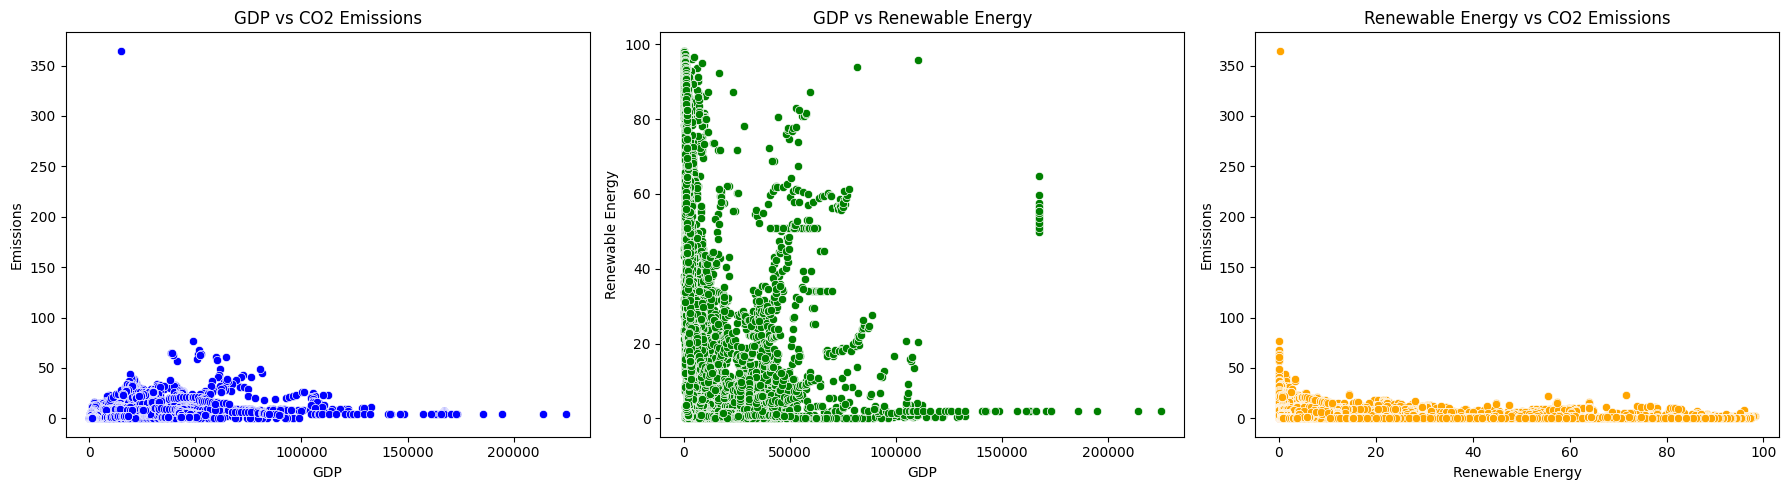

In [66]:
# Identifica correlaciones entre crecimiento del PIB y sostenibilidad.
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# GDP vs. CO2 Emissions
sns.scatterplot(data=df, x="GDP", y="Emissions", ax=axes[0], color='blue')
axes[0].set_title("GDP vs CO2 Emissions")

# GDP vs. Renewable Energy
sns.scatterplot(data=df, x="GDP", y="Renewable Energy", ax=axes[1], color='green')
axes[1].set_title("GDP vs Renewable Energy")

# Renewable Energy vs. CO2 Emissions
sns.scatterplot(data=df, x="Renewable Energy", y="Emissions", ax=axes[2], color='orange')
axes[2].set_title("Renewable Energy vs CO2 Emissions")

plt.tight_layout()
plt.show()


In [67]:
# Identificar el valor outlier de emisiones
max_emission = df['Emissions'].max()

# Identificar la fila con el valor outlier de emisiones
extreme_outlier = df[df['Emissions'] == max_emission]
print("Extreme Outlier:")
print(extreme_outlier)

Extreme Outlier:
      Country  Year           GDP  Renewable Energy  Emissions
15971  Kuwait  1991  14812.920013               0.3   364.6994


In [68]:
# Quitar el outlier extremo
df = df[df['Emissions'] != max_emission]

## Visualización de Datos

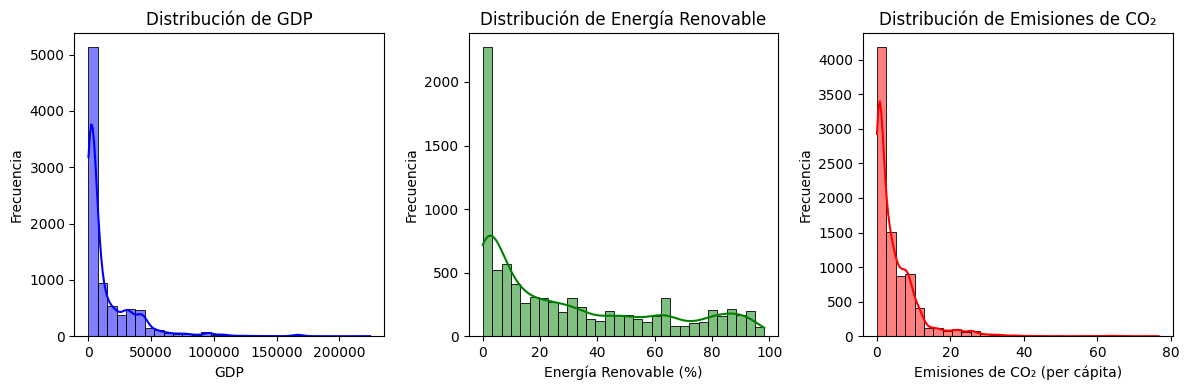

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Histograma de GDP
sns.histplot(df['GDP'], kde=True, bins=30, color='blue', ax=axes[0])
axes[0].set_title("Distribución de GDP")
axes[0].set_xlabel("GDP")
axes[0].set_ylabel("Frecuencia")

# Histograma de Renewable Energy
sns.histplot(df['Renewable Energy'], kde=True, bins=30, color='green', ax=axes[1])
axes[1].set_title("Distribución de Energía Renovable")
axes[1].set_xlabel("Energía Renovable (%)")
axes[1].set_ylabel("Frecuencia")

# Histograma de Emissions
sns.histplot(df['Emissions'], kde=True, bins=30, color='red', ax=axes[2])
axes[2].set_title("Distribución de Emisiones de CO₂")
axes[2].set_xlabel("Emisiones de CO₂ (per cápita)")
axes[2].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

### Distrubuciones de Datos
Como todas las distribuciones están sesgadas a la derecha, significa que la mayoría de los países tienen un PIB, uso de energía renovable y emisiones más bajas, con unos pocos valores atípicos en el extremo superior. Eso indica que:
- Existe una gran disparidad econónmica, con pocos países dominando el PIB.
- Dado que las emisiones siguen un patrón similar, los países con mayor PIB tienden a emitir más.
- Dado que la adopción de energía renovable tiene una cola larga, algunos países invierten mucho en energías limpias, mientras que otros aún tienen un bajo uso.


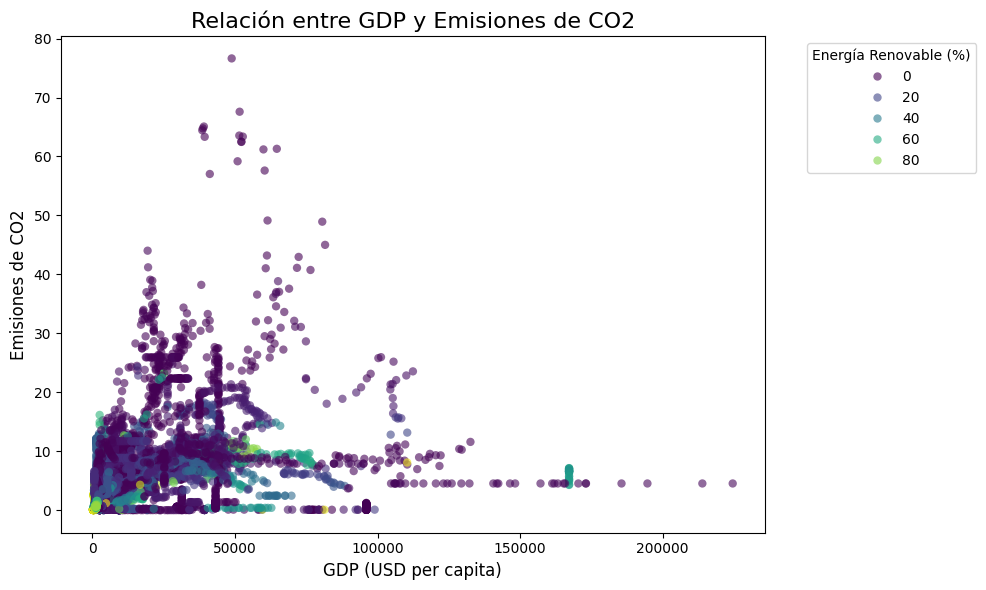

In [70]:
# Gráfico de dispersión para comparar GDP y Emisiones
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x="GDP", y="Emissions", hue="Renewable Energy", palette="viridis", alpha=0.6, edgecolor='none')

plt.title("Relación entre GDP y Emisiones de CO2", fontsize=16)
plt.xlabel("GDP (USD per capita)", fontsize=12)
plt.ylabel("Emisiones de CO2", fontsize=12)
plt.legend(title="Energía Renovable (%)", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Relación entre PIB y emisiones de CO2
La forma cono del gráfico indica que los países con bajo PIB tienen emisiones bajas de manera consistente. Sin embargo, algunos los países con menos porcentaje de consumo de energía renovable, represenatados por los puntos morados, tienen las emisiones más altas. Eso implica que existe correlación entre PIB y emisiones, pero no es uniforme.

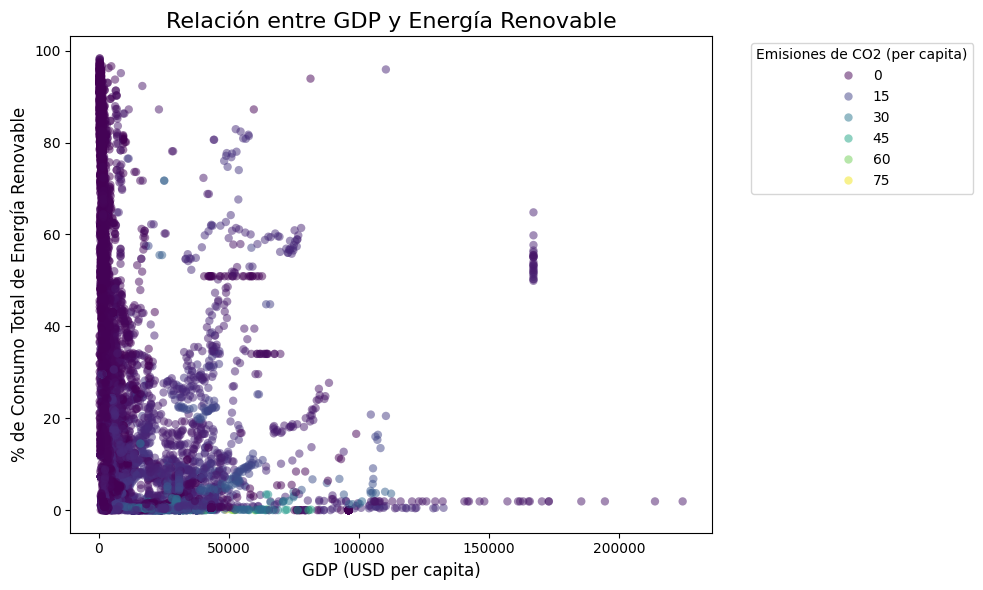

In [71]:
# Gráfico de dispersión para comparar GDP y Energía Renovable
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x="GDP", y="Renewable Energy", hue="Emissions", palette="viridis", alpha=0.5, edgecolor='none')

plt.title("Relación entre GDP y Energía Renovable", fontsize=16)
plt.xlabel("GDP (USD per capita)", fontsize=12)
plt.ylabel("% de Consumo Total de Energía Renovable", fontsize=12)
plt.legend(title="Emisiones de CO2 (per capita)", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Relación entre GDP y Energía Renovable
La presencia de muchos puntos alineados verticalmente cerca del eje Y de consumo de energía renovable indica que varios países tienen bajo PIB pero una amplia variabilidad en el uso de energía renovable. Eso implica que:
- Algunos países con bajo PIB han adoptado niveles altos de energía renovable, lo que sugiere que la inversión en energía limpia no depende exclusivamente de la riqueza económica.
- Sin embargo, otros países con PIB bajo tienen uso casi nulo de energía renovable, reflejando dificultades de acceso a tecnologías sostenibles.

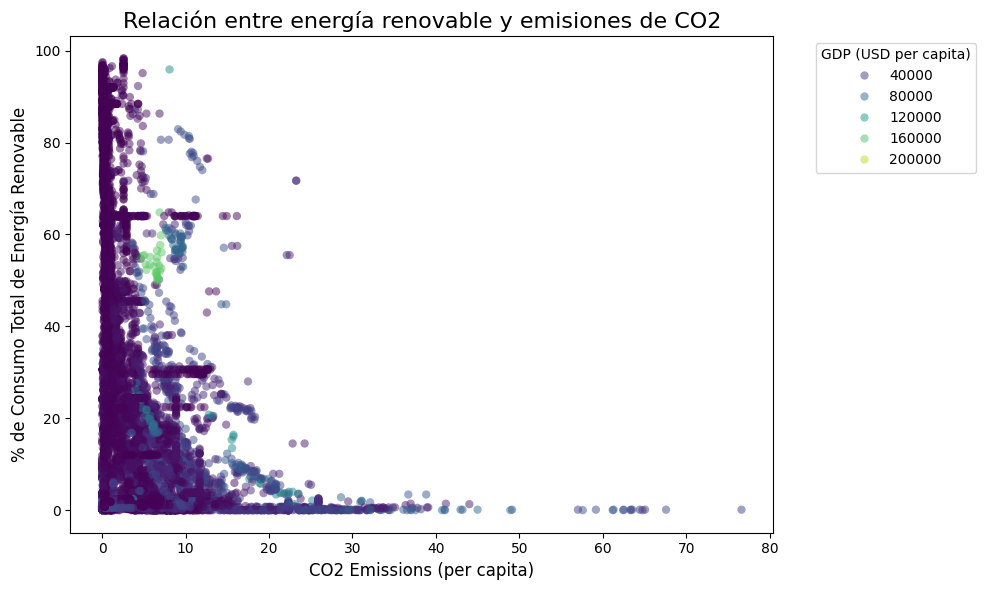

In [72]:
# Gráfico de dispersión para comparar energía renovable y emisiones de CO2
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x="Emissions", y="Renewable Energy", hue="GDP", palette="viridis", alpha=0.5, edgecolor='none')

plt.title("Relación entre energía renovable y emisiones de CO2", fontsize=16)
plt.xlabel("CO2 Emissions (per capita)", fontsize=12)
plt.ylabel("% de Consumo Total de Energía Renovable", fontsize=12)
plt.legend(title="GDP (USD per capita)", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Relación entre energía renovable y emisiones de CO2
La dispersión de bajo uso de renovables con algunos puntos cerca de cero emisiones sugiere que muchos países aún dependen de fuentes no renovables, aunque algunos han alcanzado niveles cercanos a cero en emisiones. Algunos países con alto uso de energía renovable logran mantener bajas sus emisiones, indicando prácticas sostenibles exitosas. Sin embargo, muchos países aún tienen baja adopción de energías limpias y altas emisiones, mostrando el desafío de la transición energética.

## Conclusiones
Los gráficos narran una historia sobre desigualdad económica y esfuerzos de sostenibilidad. Mientras que los países ricos tienen la oportunidad de adoptar energías renovables, sus niveles de emisiones varían ampliamente, lo que demuestra distintas estrategias hacia la sostenibilidad. Es decir que este estudio refuerze la idea de que, si bien el crecimiento económico a menudo se asocia con mayores emisiones, no es una relación inmutable. La adopción de energías renovables no está determinada exclusivamente por el nivel de PIB: mientras que países con altos ingresos tienen la capacidad de invertir en tecnologías limpias, también hay casos interesantes en economías de menor ingreso que muestran un potencial significativo en este ámbito.

### Recomendaciones para Futuras Investigaciones
Para investigar más en este tema, se pueden considerar diferentes enfoques para profundizar en la relación entre el crecimiento económico y la sostenibilidad.
#### Factores Políticos y Regulatorios
- Analizar el impacto de subsidios gubernamentales en el desarrollo de energías renovables.
- Comparar la efectividad de políticas medioambientales en países con distintos niveles de PIB.
#### Modelos de Crecimiento Sostenible
- Examinar casos de países que han logrado desacoplar el crecimiento económico del aumento en emisiones.
- Identificar estrategias económicas viables para una transición más efectiva hacia la sostenibilidad.
#### Factores Demográficos y de Consumo
- Evaluar cómo la densidad poblacional y el consumo energético afectan el desarrollo sostenible.
- Analizar si el acceso a energías limpias está limitado por diferencias socioeconómicas.